## Exploratory Data Analysis
In this notebook, we will perform an Exploratory Data Analysis (EDA). The main objective of this type of analysis is to find some interesting information or patterns hidden in the data. Some of the findings here may be utilised directly or, in most cases, require further analyses using machine learning. 

EDA usually involves:
1. Data import and cleaning
2. Other activities to acquire additional data from web scrapping etc.
3. Data visualisation
4. Computational of the statistics or trends of the data
5. Prepare data for machine learning if required

We will be using a modified version of the California Housing dataset taken from https://github.com/ageron/handson-ml. This dataset is usually used to illustrate how machine learning can be used to predict house prices using regression technique. We will explore this further in the next notebook.

# 1. Introduction
In addition to the usual Numpy and Matplotlib libraries, we will also use Pandas (Python for Data Analysis) library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(seed=4400)

import seaborn as sns
sns.set()

# 2. Pandas
Load the data into Pandas.

In [2]:
housing = pd.read_csv('files/housing.csv')
# use this if runnin gfrom Colab
# housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
type(housing)

pandas.core.frame.DataFrame

The data is now in Pandas dataframe format. Unlike Numpy where we can only have a single numeric type in an array, dataframe allows mixed type data (string, numerics etc.).

## 2.1 Data overview

Let's explore some of the methods to view the dataframe.

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2.2 Indexing and Selecting Data

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing['median_income'].head(3)

0    8.3252
1    8.3014
2    7.2574
Name: median_income, dtype: float64

In [10]:
housing['population'][0:5]

0     322.0
1    2401.0
2     496.0
3     558.0
4     565.0
Name: population, dtype: float64

In [11]:
housing['population'][0]

322.0

In [12]:
housing.loc[0]

longitude              -122.23
latitude                 37.88
housing_median_age          41
total_rooms                880
total_bedrooms             129
population                 322
households                 126
median_income           8.3252
median_house_value      452600
ocean_proximity       NEAR BAY
Name: 0, dtype: object

In [13]:
housing.loc[0]['population']

322.0

In [14]:
housing.iloc[0][5]

322.0

In [15]:
housing.iloc[0,5]

322.0

## 2.3 Bad Data

The data we have here is relatively clean. All of the entries have values except some of them. Use ```.isnull().sum()``` to check the rows with no values.

In [16]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

It is worth to note that the data in real world will be much more messier (missing rows, unrecognised texts etc.). Hence in reality we will need to spend more time cleaning our data. 

One of the tasks when cleaning data is to decide what are we going to do if there are missing values in our data. Some of the options are:
1. Fill the missing values with the mean values in their columns
2. Look around their neighbours - use mean values or interpolate values from the neighbours

For now we are just going to get rid of them i.e. if there is a missing value, remove the whole row.

In [17]:
housing = housing.dropna(axis=0)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 2.4 Data Statistics

Pandas provides several fast methods for quick visualisation of the statistics of the data (these are of course also built on top of Matplotlib).

Use ```.hist``` to plot the histograms for all of the columns.

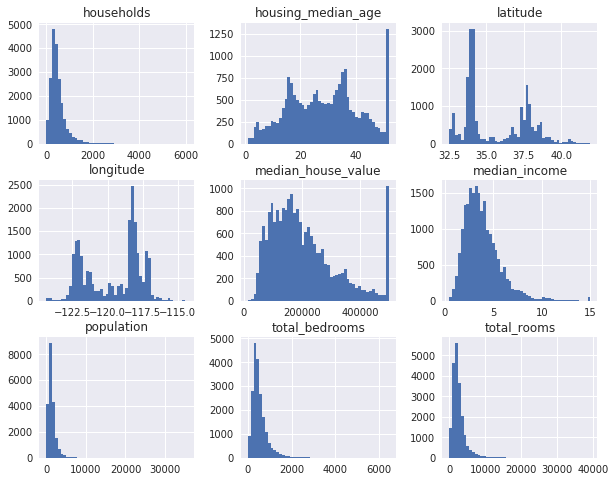

In [18]:
housing.hist(bins=50, figsize=(10,8));

Now let's plot a scatter matrix. This will give the scatter plots for each pair of the columns. 

Scatter plots provide us a quick overview of the correlation between the data. We say that two sets of data are highly correlated if there is a clear linear relationship between them in a scatter plot. 

Plotting the sama data on X and Y axes in a scatter plot (e.g. population vs. population) will just give us a straight line and will not reveal us anything. Hence why you will find that in the midddle of the scatter matrix, Pandas gives us the histogram of the data instead.

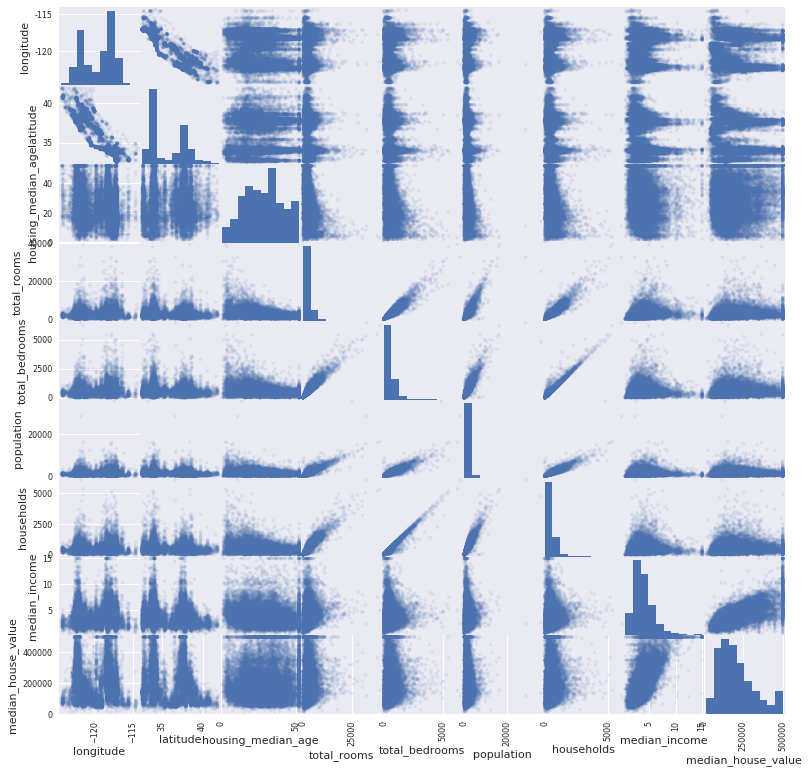

In [19]:
# we use housing[:-2] to exclude ocean proximity which is not numerics
pd.plotting.scatter_matrix(housing[:-2], figsize=(13, 13),alpha=0.1);

We can compute the correlation of each column easily using ```.corr()```.

In [20]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


This gives us the corresponding correlations from the scatter matrix. A value of 1 or -1 indicates perfect correlation. A pair of data that is highly linear as observed in the scatter matrix such as households and total bedrooms gives a very high correlation as expected.

## 2.5 Exercise
By looking at the scatter matrix above, identify and discuss any interesting correlations.

# 3. Data regression

If a pair of data on X and Y-axes has a linear relationship, we can use a line to represent them. Then, given a new data in the X-axis, we can use the line to predict the corresponding value in Y-axis using this line.   

As we can see that median income and median house value pair has a relatively high correlation of 0.688 so let's further investigated this further. We are going to use the median income data (```X``` values) to predict the median house value (```Y``` values) by using linear regression (i.e. line fitting).  

We select the data and plot them below.

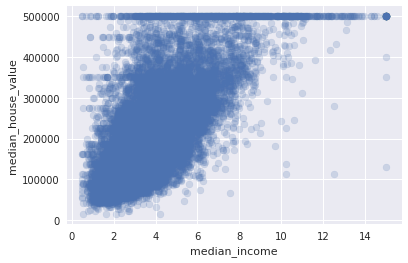

In [21]:
# Extract median income and median house value and assign them to X and Y
X, Y = housing['median_income'], housing['median_house_value']

plt.scatter(X,Y,alpha=0.2)
plt.xlabel('median_income')
plt.ylabel('median_house_value');

Let's just take 80% of the data for regression. We keep the remaining 20% aside and only use it to check whether our regression is doing a decent job. We refer these as training data (the 80%) and testing data (the remaining 20%).

Splitting of the training and testing data is a routine task in machine learning. We can easily do this using ```train_test_split``` method in Sklearn. Sklearn also provides many other methods to perform such tasks.

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16346,)
(16346,)
(4087,)
(4087,)


Notice the ratio of traning to testing data is 80:20 achieved by specifying ```test_size=0.2```.

Let's visualise the testing and training data.

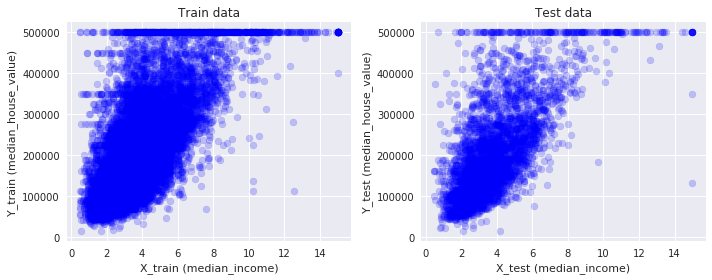

In [23]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X_train,Y_train,alpha=0.2,label='Train data',c='b')
plt.title('Train data')
plt.xlabel('X_train (median_income)')
plt.ylabel('Y_train (median_house_value)');

plt.subplot(1,2,2)
plt.scatter(X_test,Y_test,alpha=0.2, label='Test data',c='b')
plt.title('Test data')
plt.xlabel('X_test (median_income)')
plt.ylabel('Y_test (median_house_value)')
plt.tight_layout()

Now we want to fit the training data to a straight line. We can easily do this manually by minimising using the least squared errors method, but we are going to use the ```stats.linregress``` from Scipy library.

In [24]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X_train,Y_train)
print(slope)
print(intercept)

42309.2181847
43216.63157


The linear regression gives a best fit line (i.e. a slope and an intercept) that minimises the squared error of the training data. 

This straight line now becomes our 'model'. Given a X value (i.e. median income) we can predict the Y value (median house value) using this model.

We want to check how the model will perform when used to predict the median house values from testing data.

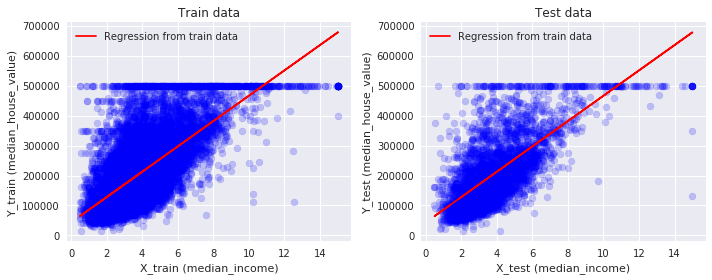

In [25]:
# calculate the median house value given the median income using our model.
Y_regressed = X_train*slope+intercept # training data
Y_predicted = X_test*slope+intercept # testing data

# plot training data
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X_train,Y_train,alpha=0.2,c='b')
plt.plot(X_train, Y_regressed, 'r')
plt.title('Train data')
plt.xlabel('X_train (median_income)')
plt.ylabel('Y_train (median_house_value)');
plt.legend(['Regression from train data'])

# plot testing data
plt.subplot(1,2,2)
plt.scatter(X_test,Y_test,alpha=0.2 ,c='b')
plt.plot(X_test, Y_predicted, 'r')
plt.title('Test data')
plt.xlabel('X_test (median_income)')
plt.ylabel('Y_test (median_house_value)');
plt.legend(['Regression from train data'])
plt.tight_layout()

Let's plot the median house values with the real values on X-axis and the predicted values on Y-axis. A perfect match between real and predicted values will fall on the 45 degree line.

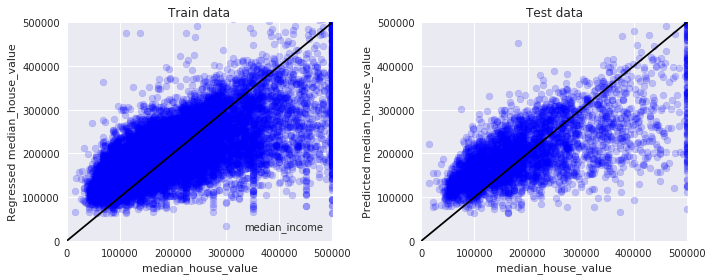

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(Y_train,Y_regressed,alpha=0.2,c='b')
plt.plot([0,500000], [0,500000],c='k')
plt.title('Train data')
plt.xlabel('median_house_value')
plt.ylabel('Regressed median_house_value');
plt.xlim(0,500000)
plt.ylim(0,500000)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(Y_test,Y_predicted,alpha=0.2,c='b')
plt.plot([0,500000], [0,500000],c='k')
plt.title('Test data')
plt.xlabel('median_house_value')
plt.ylabel('Predicted median_house_value');
plt.xlim(0,500000)
plt.ylim(0,500000)

plt.tight_layout()

## 3.1 Exercise
We will now repeat the regression using Sklearn.

In [27]:
from sklearn import linear_model

Before we proceed, recall that our ```X_train``` only has one column (median_house_value) with many rows. In machine learning: 
1. This column is called 'feature' 
2. These rows are called 'samples'. 

Let's check again the shape of ```X_train``` using ```X_train.shape```

In [28]:
X_train.shape

(16346,)

You should get (16346,) here. The shape is ambiguous - Sklearn will have problem determining whether this data has
1. 1 feature and 16346 samples, or 
2. 16346 features and 1 sample

So we need to force it to have one column data by using ```.reshape(-1,1)``` function  in Numpy (-1 here simply means we want Numpy to figure out itself the correct number of rows).

In [29]:
# No reshape function in Pandas,
# so we convert to numpy array using X_train.values 
X_train = X_train.values.reshape(-1,1)

X_train.shape

(16346, 1)

Then we create a linear regressor object called ```reg```. 

In [30]:
reg = linear_model.LinearRegression()
type(reg)

sklearn.linear_model.base.LinearRegression

Previously we saw that we need to supply ```X_train``` and ```Y_train``` data for regression. Similarly, we can do it here using ```.fit``` method i.e. ```reg.fit(X_train.values.reshape(-1,1), Y_train)```.

In [31]:
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can check the slope and intercept.

In [32]:
print(reg.coef_)
print(reg.intercept_)

[ 42309.21818466]
43216.63157


We can now use the regression model compute Y given X using using ```.predict```. So for our ```X_test``` data

In [33]:
X_test = X_test.values.reshape(-1,1) # remember we need to reshape X_test first

Y_predicted_sk = reg.predict(X_test) 

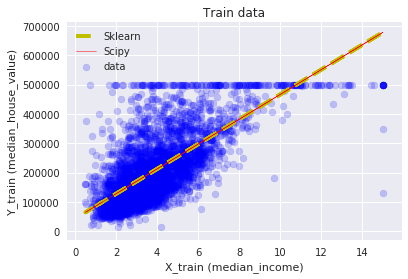

In [34]:
plt.plot(X_test, Y_predicted_sk, '--y',linewidth=4,label='Sklearn')
plt.plot(X_test, Y_predicted, 'r',linewidth=0.5,label='Scipy')
plt.scatter(X_test,Y_test,alpha=0.2, c='b', label='data')
plt.title('Scipy vs Sklearn 1D regression')
plt.title('Train data')
plt.xlabel('X_train (median_income)')
plt.ylabel('Y_train (median_house_value)');
plt.legend();

Nothing exciting here. Sklearn gives exactly the same results as expected. But, we will revisit this by performing multi-dimensional regression using Sklearn in the next notebook. 

# 4. Spatial mapping

Looking at how the data is distributed geographically may provide another insight.

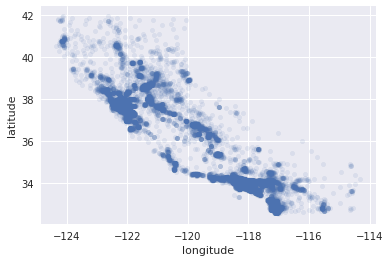

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

We can see from above the data is higly concentration at certain regions.

Now let's refine our plot further

1. Use the marker size to represent the population 
2. Use colour to represent the median house value

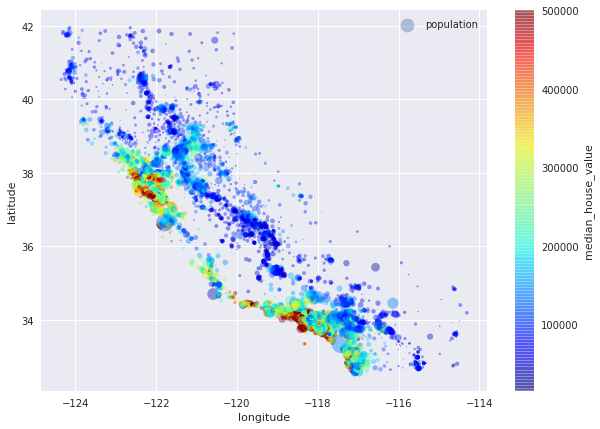

In [36]:
marker_size = housing["population"]/100 # we rescale the size by 100. If not the size will be too big/small
colour = "median_house_value"

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=marker_size, c= colour,
            label="population", figsize=(10,7),
            cmap=plt.get_cmap("jet"), colorbar=True,
            sharex=False)
plt.legend()

You might have noticed there's a pattern here. The highly populated and expensive areas are along the California coastline. 

Let's plot overlay an image of California map on top of the scatter plot.

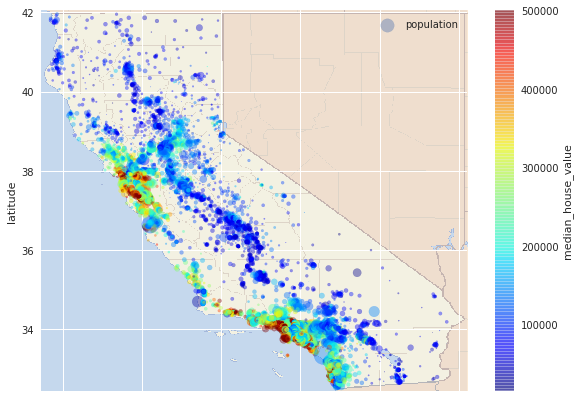

In [37]:
import matplotlib.image as mpimg

# taken from https://github.com/ageron/handson-ml
california_img=mpimg.imread('files/california.png')

# use this if running from Colab
# california_img=mpimg.imread('https://raw.githubusercontent.com/ageron/handson-ml/master/images/end_to_end_project/california.png')

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=marker_size, c= colour,
            label="population", figsize=(10,7),
            cmap=plt.get_cmap("jet"), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

Seems like there's also another pattern here. There is a strip of populated areas, but with lower house values. Perhaps, a map with elevation/terrain will provide another clue...

## 4.1 Exercise
In this exercise, we will replot the scatter diagram on top of a real map using Basemap. 

Try running the following code. If you get an error, exit Jupyter notebook and close Anaconda. Then, install Basemap and Basemap-data-hires in the Anaconda GUI. 

Or if you are familar with the terminal:
1. conda install -c anaconda basemap 
2. conda install basemap-data-hires

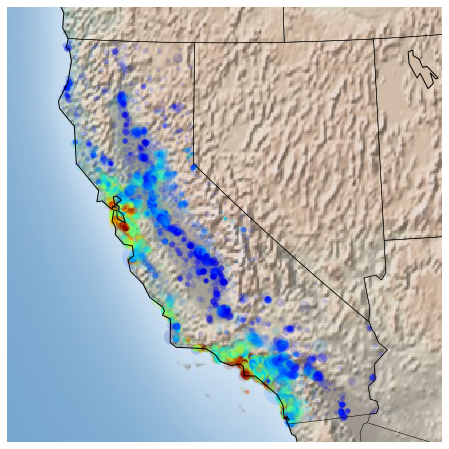

In [38]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 8))
# create a map object m
m = Basemap(projection='lcc', resolution='l', 
            lat_0=37.5, lon_0=-119,
            width=1.2E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawstates(color='black')

# your data here
long = housing['longitude'].values # convert to numpy array
lat = housing['latitude'].values
x, y = m(long, lat) # convert to coordinates
m.scatter(x,y, alpha=0.15,facecolors='none',
          c=housing['median_house_value'].values,cmap='jet', 
          s=housing['population'].values/50)